# Project Header

*Student's name*

---

## Project description

text

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import normalize

warnings.filterwarnings('ignore')

# Loading the data

In [2]:
DATA = pd.read_csv('./data.csv', index_col=0).iloc[:,:-1]
X = DATA.iloc[:,1:]
Y = DATA.diagnosis

DATA

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# Data Visualization / Analysis

Unique y-values ['M' 'B']


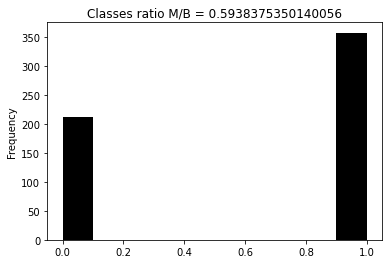

In [3]:
print('Unique y-values', Y.unique())

#Encode M and B classes by 0 and 1 values
try: 
    Y.replace(['M','B'], [0,1], inplace=True) 
except: 
    pass

Y.plot(kind='hist', color='black', title='Classes ratio M/B = {}'.format(Y[Y==0].count()/Y[Y==1].count()));

That is, objective feature Y is not well-balanced (ratio should be close to 1). We need to balance it by augmenting the dataset or cutting objects corresponding to B class. Also we can just use different weights for each of the classes.

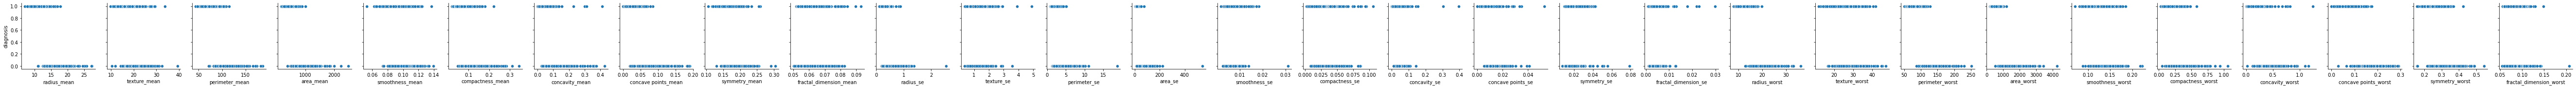

In [5]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, shuffle=True)

TRAIN = pd.concat([X_TRAIN,Y_TRAIN], axis=1)
#now we work only with train sets, we are not able to sneak what happends in test sets
sns.pairplot(TRAIN, y_vars='diagnosis', x_vars=X_TRAIN.columns.values);

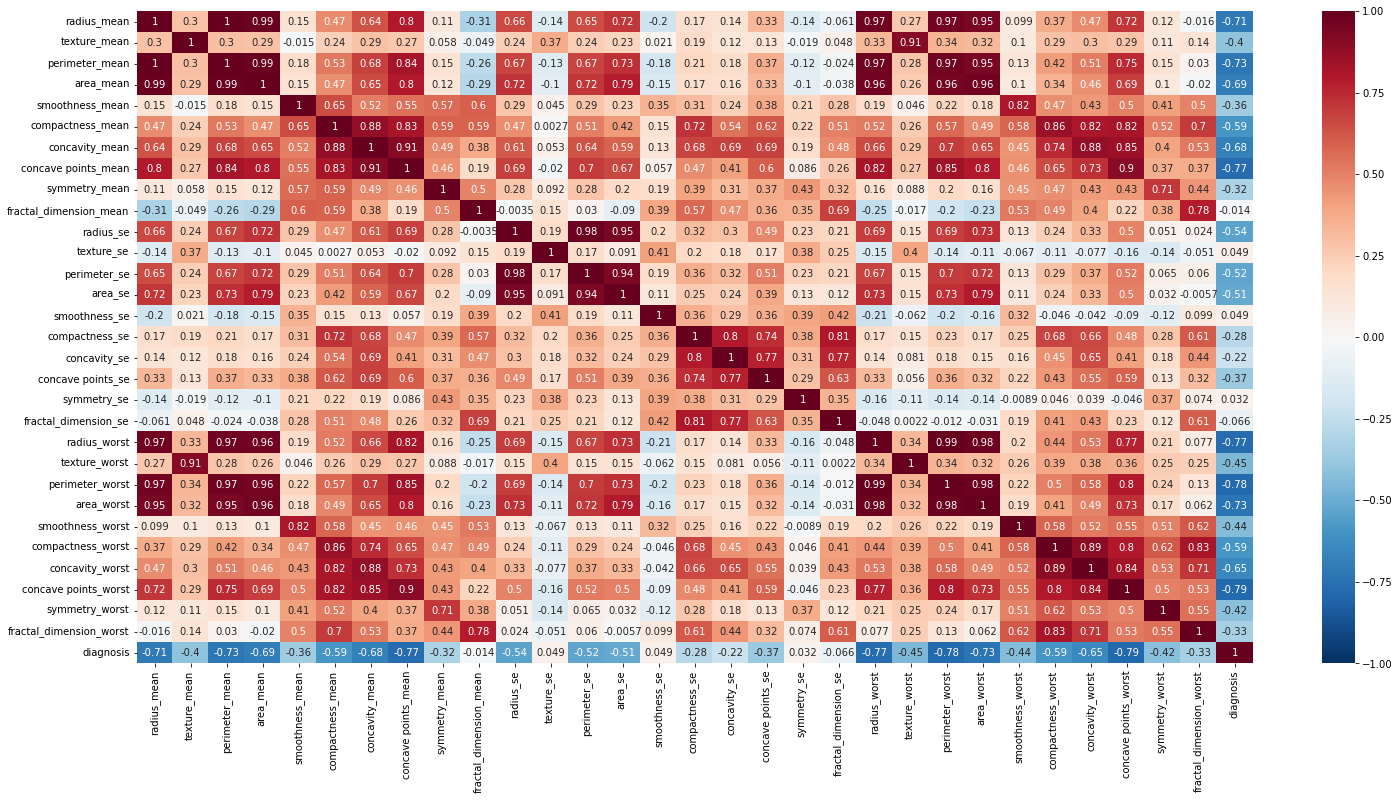

In [5]:
plt.figure(figsize=(25,12))
sns.heatmap(TRAIN.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

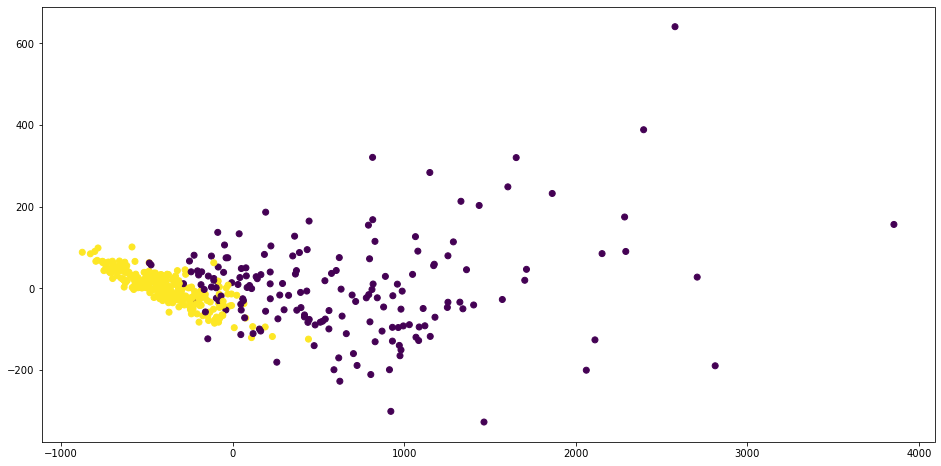

In [15]:
pca_2 = PCA(n_components=2)
X_TRAIN_PCA_2 = pca_2.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
plt.scatter(X_TRAIN_PCA_2[:,0], X_TRAIN_PCA_2[:,1], marker='o', c=(TRAIN.diagnosis==1), label='Class 1')
plt.legend;

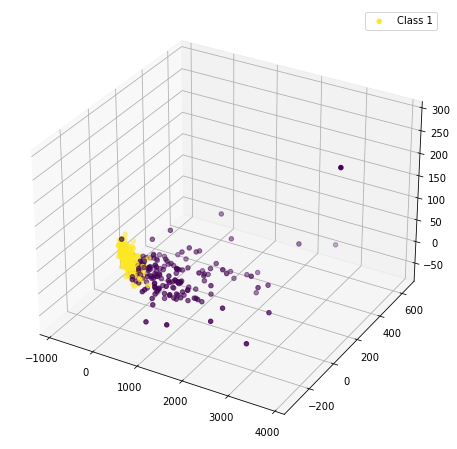

In [16]:
pca_3 = PCA(n_components=3)
X_TRAIN_PCA_3 = pca_3.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.scatter(X_TRAIN_PCA_3[:,0], X_TRAIN_PCA_3[:,1], X_TRAIN_PCA_3[:,2], marker='o', c=(TRAIN.diagnosis==1), label='Class 1')
plt.legend();

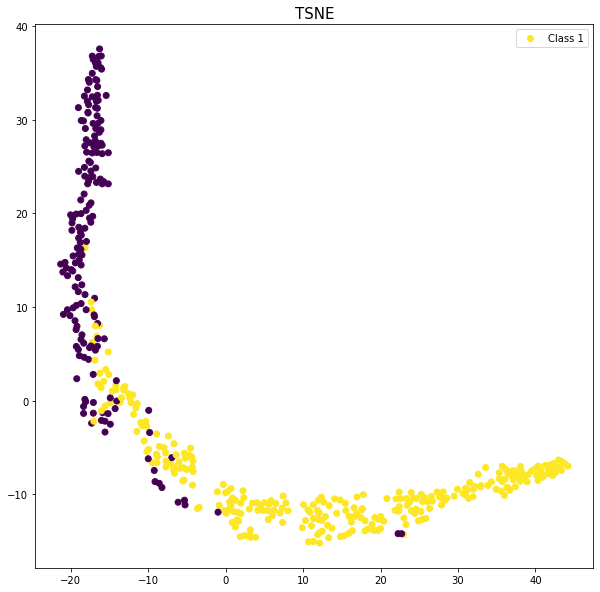

In [13]:
# add legend
tsne2 = TSNE(random_state=0)
PIC2 = tsne2.fit_transform(TRAIN)

fig = plt.figure(figsize=(10,10))
plt.scatter(PIC2[:, 0], PIC2[:, 1], c=(TRAIN.diagnosis==1), label='Class 1')
plt.title('TSNE', size=15)
plt.legend();

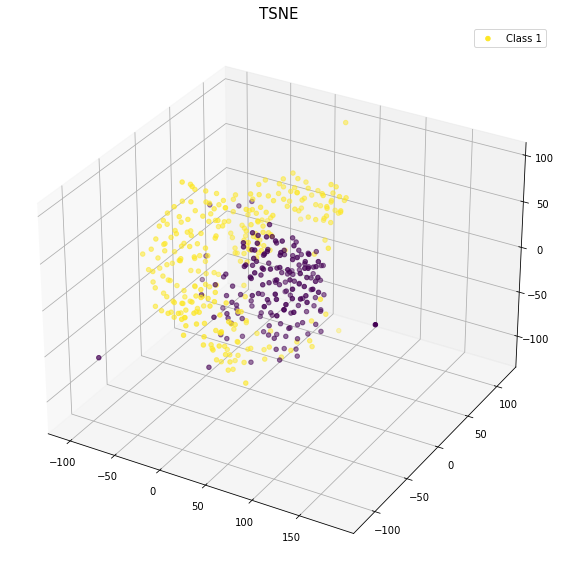

In [18]:
tsne3 = TSNE(n_components=3, random_state=0)
PIC3 = tsne3.fit_transform(TRAIN)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(PIC3[:, 0], PIC3[:, 1], PIC3[:, 2], c=(TRAIN.diagnosis==1), label='Class 1')
plt.title('TSNE', size=15)
plt.legend();

# Baseline accuracy

In [19]:
#Preparing function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [26]:
#Fitting, predicting and scoring classificator's pool (check does the class labels correctly plotted by confusion matrix)
def fit_predict(MODELS, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST):
    RESULT = []

    for k,classificator in enumerate(MODELS):
        classificator.fit(X_TRAIN, Y_TRAIN)
        RESULT.append({'Classificator' : classificator.__class__.__name__,
                      'Accuracy' : accuracy_score(Y_TEST, classificator.predict(X_TEST)),
                      'F1' : f1_score(Y_TEST, classificator.predict(X_TEST)),
                      'Precision' : precision_score(Y_TEST, classificator.predict(X_TEST)),
                      'Recall' : recall_score(Y_TEST, classificator.predict(X_TEST)),
                      'Confusion Matrix' : confusion_matrix(Y_TEST, classificator.predict(X_TEST)),
                      'ROC AUC' : roc_auc_score(Y_TEST, classificator.predict(X_TEST))})

        print(RESULT[k]['Classificator']+' Confusion Matrix')
        plot_confusion_matrix(RESULT[k]['Confusion Matrix'], classes=['Class 0', 'Class 1'], normalize=True, title='Normalized')
        plt.show()

    RESULT = pd.DataFrame(RESULT).set_index('Classificator')
    return RESULT

LogisticRegression Confusion Matrix


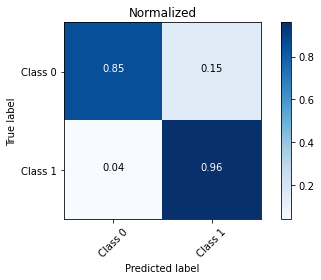

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.921053,0.940397,0.922078,0.959459,"[[34, 6], [3, 71]]",0.90473


In [27]:
MODELS = [LogisticRegression()]

fit_predict(MODELS, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

# Data Preprocessing

In [13]:
# Normalize fetures for some models
# Identify outliers
# Fill-in gaps
# and other stuff to prepare your data

TRAIN.apply(lambda x: len(x.unique())) #all the features are quantitative

radius_mean                374
texture_mean               407
perimeter_mean             428
area_mean                  436
smoothness_mean            393
compactness_mean           433
concavity_mean             436
concave points_mean        436
symmetry_mean              361
fractal_dimension_mean     409
radius_se                  439
texture_se                 417
perimeter_se               428
area_se                    425
smoothness_se              436
compactness_se             438
concavity_se               431
concave points_se          413
symmetry_se                408
fractal_dimension_se       442
radius_worst               372
texture_worst              421
perimeter_worst            423
area_worst                 439
smoothness_worst           351
compactness_worst          429
concavity_worst            432
concave points_worst       398
symmetry_worst             410
fractal_dimension_worst    431
diagnosis                    2
dtype: int64

# Feature Engineering

In [14]:
# Need to perform Feature Selection (dimensionality reduction)
# Need to think about feture derivatives 

# Experiments

LogisticRegression Confusion Matrix


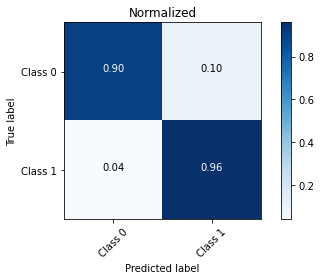

SVC Confusion Matrix


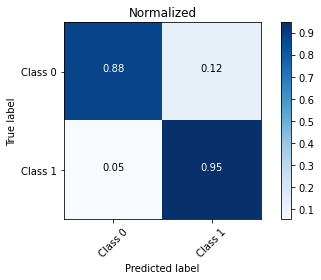

SVC Confusion Matrix


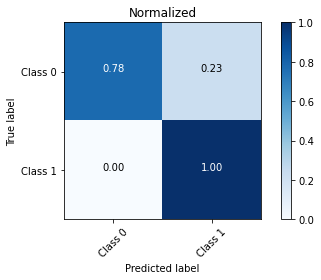

KNeighborsClassifier Confusion Matrix


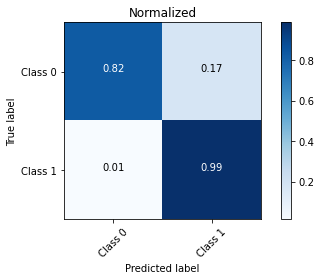

GaussianProcessClassifier Confusion Matrix


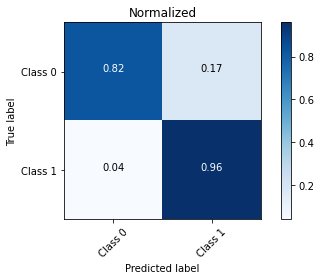

DecisionTreeClassifier Confusion Matrix


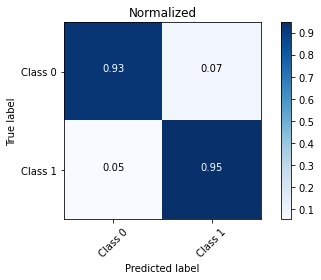

RandomForestClassifier Confusion Matrix


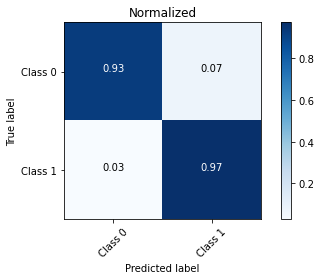

AdaBoostClassifier Confusion Matrix


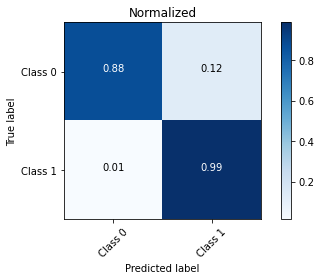

GaussianNB Confusion Matrix


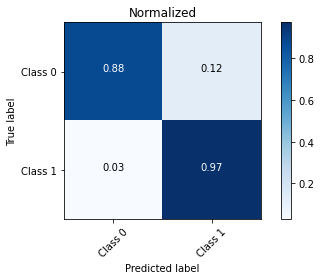

QuadraticDiscriminantAnalysis Confusion Matrix


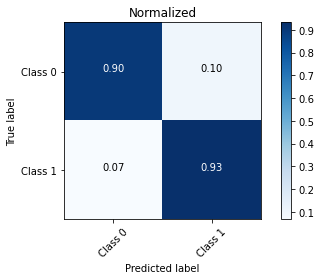

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.938596,0.953020,0.946667,0.959459,"[[36, 4], [3, 71]]",0.929730
SVC,0.921053,0.939597,0.933333,0.945946,"[[35, 5], [4, 70]]",0.910473
SVC,0.921053,0.942675,0.891566,1.000000,"[[31, 9], [0, 74]]",0.887500
KNeighborsClassifier,0.929825,0.948052,0.912500,0.986486,"[[33, 7], [1, 73]]",0.905743
GaussianProcessClassifier,0.912281,0.934211,0.910256,0.959459,"[[33, 7], [3, 71]]",0.892230
DecisionTreeClassifier,0.938596,0.952381,0.958904,0.945946,"[[37, 3], [4, 70]]",0.935473
RandomForestClassifier,0.956140,0.966443,0.960000,0.972973,"[[37, 3], [2, 72]]",0.948986
AdaBoostClassifier,0.947368,0.960526,0.935897,0.986486,"[[35, 5], [1, 73]]",0.930743
GaussianNB,0.938596,0.953642,0.935065,0.972973,"[[35, 5], [2, 72]]",0.923986


In [28]:
# Compare results of your ideas with baseline model accuracy
# Tune hyperparameters
# Stat tests everywhere

MODELS1 = [LogisticRegression(class_weight={0:1, 1:Y.value_counts()[0]/Y.value_counts()[1]}),
           SVC(kernel='linear', C=0.025), 
           SVC(), 
           KNeighborsClassifier(), 
           GaussianProcessClassifier(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           AdaBoostClassifier(),
           GaussianNB(),
           QuadraticDiscriminantAnalysis()]

fit_predict(MODELS1, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

In [29]:
for model in MODELS1:
    print(model.__class__.__name__)
    display(pd.DataFrame(cross_validate(model, X, Y, cv=5, 
                                        scoring=['accuracy','f1', 'precision', 'recall', 'roc_auc'])))

LogisticRegression


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.020392,0.005210,0.938596,0.952381,0.921053,0.985915,0.986898
1,0.014995,0.003839,0.938596,0.951049,0.944444,0.957746,0.985260
2,0.014218,0.003468,0.947368,0.958333,0.958333,0.958333,0.994709
3,0.013843,0.003542,0.903509,0.921986,0.942029,0.902778,0.980820
4,0.012918,0.003093,0.955752,0.964029,0.985294,0.943662,0.995305


SVC


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.024559,0.005579,0.921053,0.940397,0.887500,1.000000,0.990501
1,0.026253,0.004697,0.947368,0.958333,0.945205,0.971831,0.990829
2,0.029699,0.003960,0.991228,0.993103,0.986301,1.000000,0.999339
3,0.024850,0.003977,0.921053,0.937931,0.931507,0.944444,0.973545
4,0.023766,0.003622,0.964602,0.971014,1.000000,0.943662,0.997653


SVC


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.005745,0.005778,0.850877,0.891720,0.813953,0.985915,0.954471
1,0.005625,0.006273,0.894737,0.920000,0.873418,0.971831,0.977727
2,0.005499,0.006310,0.929825,0.946667,0.910256,0.986111,0.981481
3,0.005391,0.007214,0.947368,0.959459,0.934211,0.986111,0.971892
4,0.005569,0.006915,0.938053,0.951724,0.932432,0.971831,0.984239


KNeighborsClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.001463,0.009494,0.885965,0.913907,0.862500,0.971831,0.945955
1,0.001141,0.009124,0.938596,0.951724,0.932432,0.971831,0.952997
2,0.001023,0.008758,0.938596,0.951724,0.945205,0.958333,0.981151
3,0.000934,0.007773,0.947368,0.958904,0.945946,0.972222,0.962963
4,0.001100,0.007585,0.929204,0.942857,0.956522,0.929577,0.955064


GaussianProcessClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.029117,0.016098,0.868421,0.896552,0.878378,0.915493,0.577465
1,0.028297,0.013619,0.921053,0.937931,0.918919,0.957746,0.542254
2,0.027668,0.010139,0.912281,0.929577,0.942857,0.916667,0.541667
3,0.025555,0.009889,0.921053,0.937063,0.943662,0.930556,0.541667
4,0.022367,0.011349,0.911504,0.928571,0.942029,0.915493,0.549296


DecisionTreeClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.005147,0.003688,0.912281,0.927536,0.955224,0.901408,0.915821
1,0.005416,0.003421,0.912281,0.929577,0.929577,0.929577,0.906649
2,0.005660,0.003430,0.921053,0.937931,0.931507,0.944444,0.912698
3,0.005587,0.003319,0.938596,0.952381,0.933333,0.972222,0.926587
4,0.006095,0.003344,0.893805,0.909091,0.983607,0.845070,0.910630


RandomForestClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.112380,0.013729,0.938596,0.950355,0.957143,0.943662,0.987226
1,0.105687,0.013436,0.938596,0.952381,0.921053,0.985915,0.983295
2,0.104009,0.012717,0.982456,0.986111,0.986111,0.986111,0.998843
3,0.102336,0.012710,0.964912,0.972603,0.959459,0.986111,0.985946
4,0.103544,0.012705,0.973451,0.978723,0.985714,0.971831,0.998659


AdaBoostClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.080992,0.010846,0.938596,0.950355,0.957143,0.943662,0.988208
1,0.076972,0.010105,0.964912,0.972222,0.958904,0.985915,0.995087
2,0.079877,0.010459,0.991228,0.993103,0.986301,1.000000,0.999669
3,0.076715,0.010094,0.991228,0.993103,0.986301,1.000000,0.991402
4,0.076760,0.010006,0.964602,0.972222,0.958904,0.985915,0.995976


GaussianNB


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.001528,0.003511,0.921053,0.936170,0.942857,0.929577,0.972159
1,0.001115,0.003339,0.921053,0.939597,0.897436,0.985915,0.985260
2,0.001204,0.003363,0.947368,0.959459,0.934211,0.986111,0.993056
3,0.001152,0.003217,0.947368,0.958904,0.945946,0.972222,0.991733
4,0.001111,0.003186,0.955752,0.965035,0.958333,0.971831,0.994634


QuadraticDiscriminantAnalysis


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.003744,0.004248,0.973684,0.979021,0.972222,0.985915,0.992139
1,0.001865,0.004104,0.947368,0.958333,0.945205,0.971831,0.988208
2,0.001960,0.003915,0.964912,0.972222,0.972222,0.972222,0.981481
3,0.001883,0.004525,0.947368,0.958333,0.958333,0.958333,0.986772
4,0.002056,0.005205,0.955752,0.963504,1.000000,0.929577,0.995976


# Conclusion

In [44]:
#Make some conclusions